
## Bankruptcy prediction using Machine Learning techniques 



###Team

Pragya Sharma and Rohan Tiwari.




###Motivation

Bankruptcy prediction is important for creditors and investors to evaluate the likelihood that a firm may go bankrupt. It allows stakeholders to take corrective action to limit their economic losses.  Bankruptcy prediction is an early warning to not just investors but also public policy makers to take proactive steps to minimize the impact of bankruptcies. 
This problem requires high recall as classifying a bankrupt firm as non-bankrupt will confuse investors. For this problem, false alerts are fine but it should not miss any firms that are going to go bankrupt.



### Data

https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?select=data.csv

The dataset has 96 columns (95 features and 1 class attribute) and 6819 instances. 



### Methodology

1. Our experiments will first begin by importing the data. The data is available in the file data.csv and will be loaded as a DataFrame. 
2. Next the data will be analyzed to check for class distributions, null values, missing values and any other sanity checks. 
3. The next step will be to divide the data into training and test datasets using appropriate form of sampling
4. Several experiments will be run using different Machine Learning algorithms and their performance will be evaluated on test set after tuning hyperparameters.
5. The results will be compared to determine the best performing algorithm.

### References
1. Undersampling bankruptcy prediction: Taiwan bankruptcy data. Haoming Wang and Xiangdong Liu. Published online 2021 Jul 1. doi: 10.1371/journal.pone.0254030.
2. Liang, D., Lu, C.-C., Tsai, C.-F., and Shih, G.-A. (2016) Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study. European Journal of Operational Research, vol. 252, no. 2, pp. 561-572.

### Statement of contributions by each team member

#### Rohan Tiwari
1. Preprocessing the data - handling missing values, categorical features, feature scaling and utility functions.
2. Logistic Regression
3. Support Vector Machines
4. PCA
5. Support Vector Machines with PCA
6. Random Forest Classifier
7. AdaBoost Classifier
8. Gradient Boosting Classifier

#### Pragya Sharma
1. Data Visualization
2. Extra- trees Classifier
2. Bagging and Pasting Classifier
3. Hard and Soft Voting Classifier
4. k-NN Classifier
5. Feature Selection using Random Forests and implementing Logistic Regression,SVM
6. Nueral Networks - to do


In [1]:
#from google.colab import files
#files.upload()

## Reading the data

This section reads the data from .csv file and splits it appropriately into training and test datasets.

In [2]:
# read the data 
import os
import numpy as np
import pandas as pd
data = pd.read_csv("data.csv")
data.head()



,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


<AxesSubplot:>

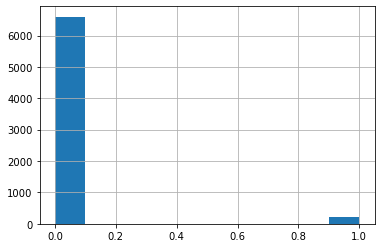

In [3]:
#check distribution of bankrupt variable which is the target variable

data['Bankrupt?'].hist()

As seen above, the target variable is highly imbalanced as is also mentioned in the paper by Liang et. al. To better handle this imbalanced class data, stratified sampling is used.

Also, to take care of this class imbalance problem, class_weight='balanced' parameter is used in the classifiers.  This modifies the training procedure for classifiers to take into account the imbalance classes. By default, equal weights are assigned but with class_weight='balanced' weights are assigned during training that are inversely proportional to the frequency of classes. This penalizes the misclassification more for the minority class compared to the majority one. 

A training-test split of 80-20 is used in the stratified sampling implementation below.

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Bankrupt?"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

X_raw = strat_train_set.drop("Bankrupt?", axis=1)
y = strat_train_set["Bankrupt?"].copy()

X_test = strat_test_set.drop("Bankrupt?", axis=1)
y_test = strat_test_set["Bankrupt?"].copy()


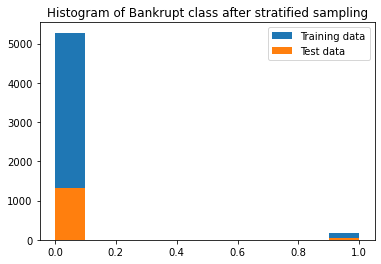

In [5]:
import matplotlib.pyplot as plt

plt.hist(strat_train_set["Bankrupt?"], label="Training data")
plt.hist(strat_test_set["Bankrupt?"], label="Test data")
plt.title("Histogram of Bankrupt class after stratified sampling")
plt.legend()
plt.show()

## Data Visualization

The categorical data is distinguished as binary 1 and 0, thus stored as "int64". We separate the numeric and categoric data to analyze our dataset.

In [6]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index

data[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

1. The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0. A majority number of times, organizations/company's assets are more than their liabilities

 Liability-Assets Flag  Bankrupt?
0                       0            6597
                        1             214
1                       1               6
                        0               2
dtype: int64


<AxesSubplot:>

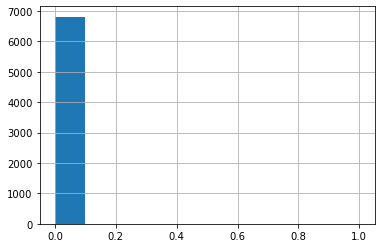

In [7]:
print(data[[' Liability-Assets Flag','Bankrupt?']].value_counts())
data[' Liability-Assets Flag'].hist()

The "Liability-Assets" flag does not provide any strong evidence of correlation

2. The "Net Income" flag denotes the status of an organization's income in the last two years, where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. We observe that all the records have been exhibiting a loss for the past two years.

In [8]:
print(data[[' Net Income Flag','Bankrupt?']].value_counts())

 Net Income Flag  Bankrupt?
1                 0            6599
                  1             220
dtype: int64


Many organizations that have suffered losses for the past two years have stabilized their business, thus avoiding bankruptcy. However the "Net Income Flag" does not provide any strong evidence of correlation between negative net income and bankruptcy as all the companies have same flag value

3. For sake of simplicity, analyzing top 9 positively and negatively correlated attributes

In [9]:
positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:9].index.tolist()
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:9].index.tolist()

positive_corr = data[positive_corr + ["Bankrupt?"]].copy()
negative_corr = data[negative_corr + ["Bankrupt?"]].copy()

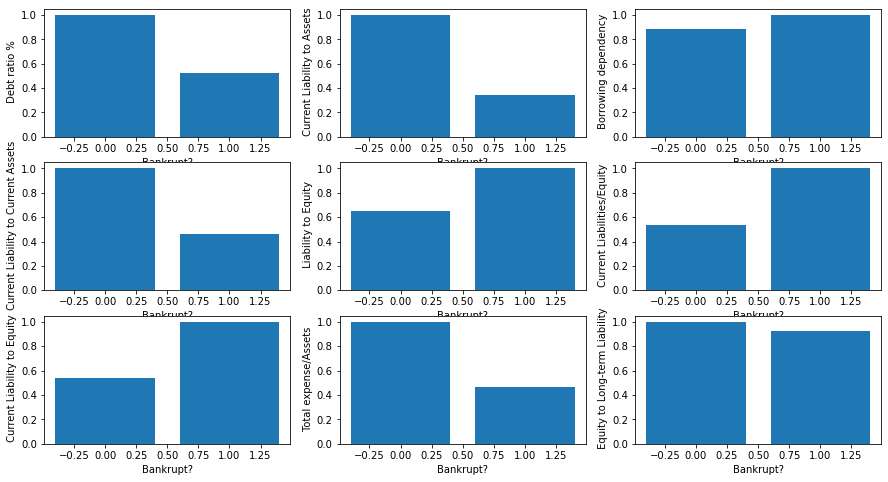

In [10]:
def barplot_graph(xval,yval):
    fix, axes = plt.subplots(ncols=3, figsize=(15,8), sharey=True)
    for i in range(1,10):
        plt.subplot(3,3,i)  
        plt.bar(xval,yval[i-1],data = data)
        plt.xlabel(xval)
        plt.ylabel(yval[i-1])

xval = positive_corr.columns.tolist()[-1]
yval = positive_corr.columns.tolist()[:-1]
barplot_graph(xval,yval)
plt.show()

We see that attributes - "Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets, Current Liabilities/Equity,Current Liabilities to Equity,Total Expenses to Assets  " are commonly high in bankrupt organizations. This makes sense as we would expect the debt/liabilities to be high for companies highly likely to get bankrupt (unable to meet obligations)

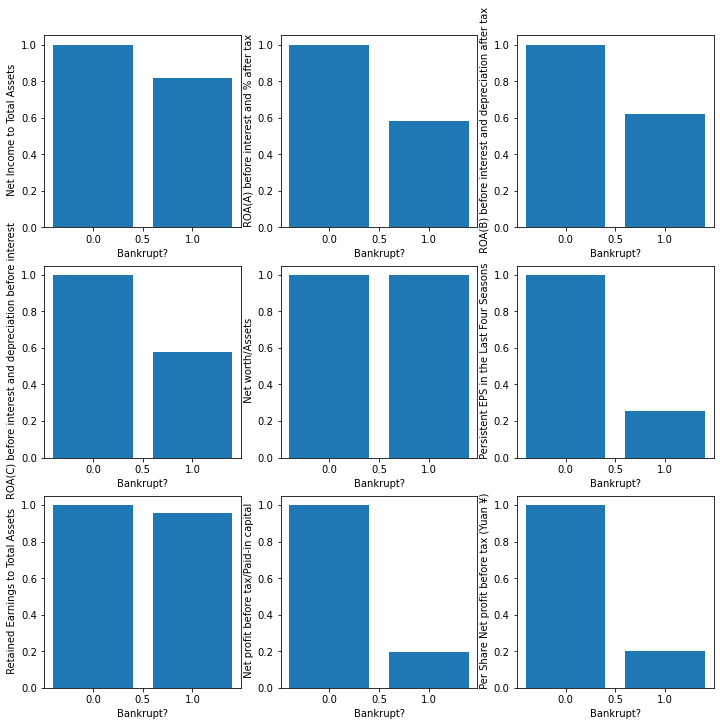

In [11]:
xval = negative_corr.columns.tolist()[-1]
yval = negative_corr.columns.tolist()[:-1]
fix, axes = plt.subplots(ncols=3, figsize=(12,12), sharey=True)
for i in range(1,10):
    plt.subplot(3,3,i)  
    plt.bar(xval,yval[i-1],data = data)
    plt.xlabel(xval)
    plt.ylabel(yval[i-1])


These attributes show us that the more the assets and earnings of a company, the less likely is the organization to be bankrupt.

Let us check the relation of top 9 positive and negative correlation attributes among each other

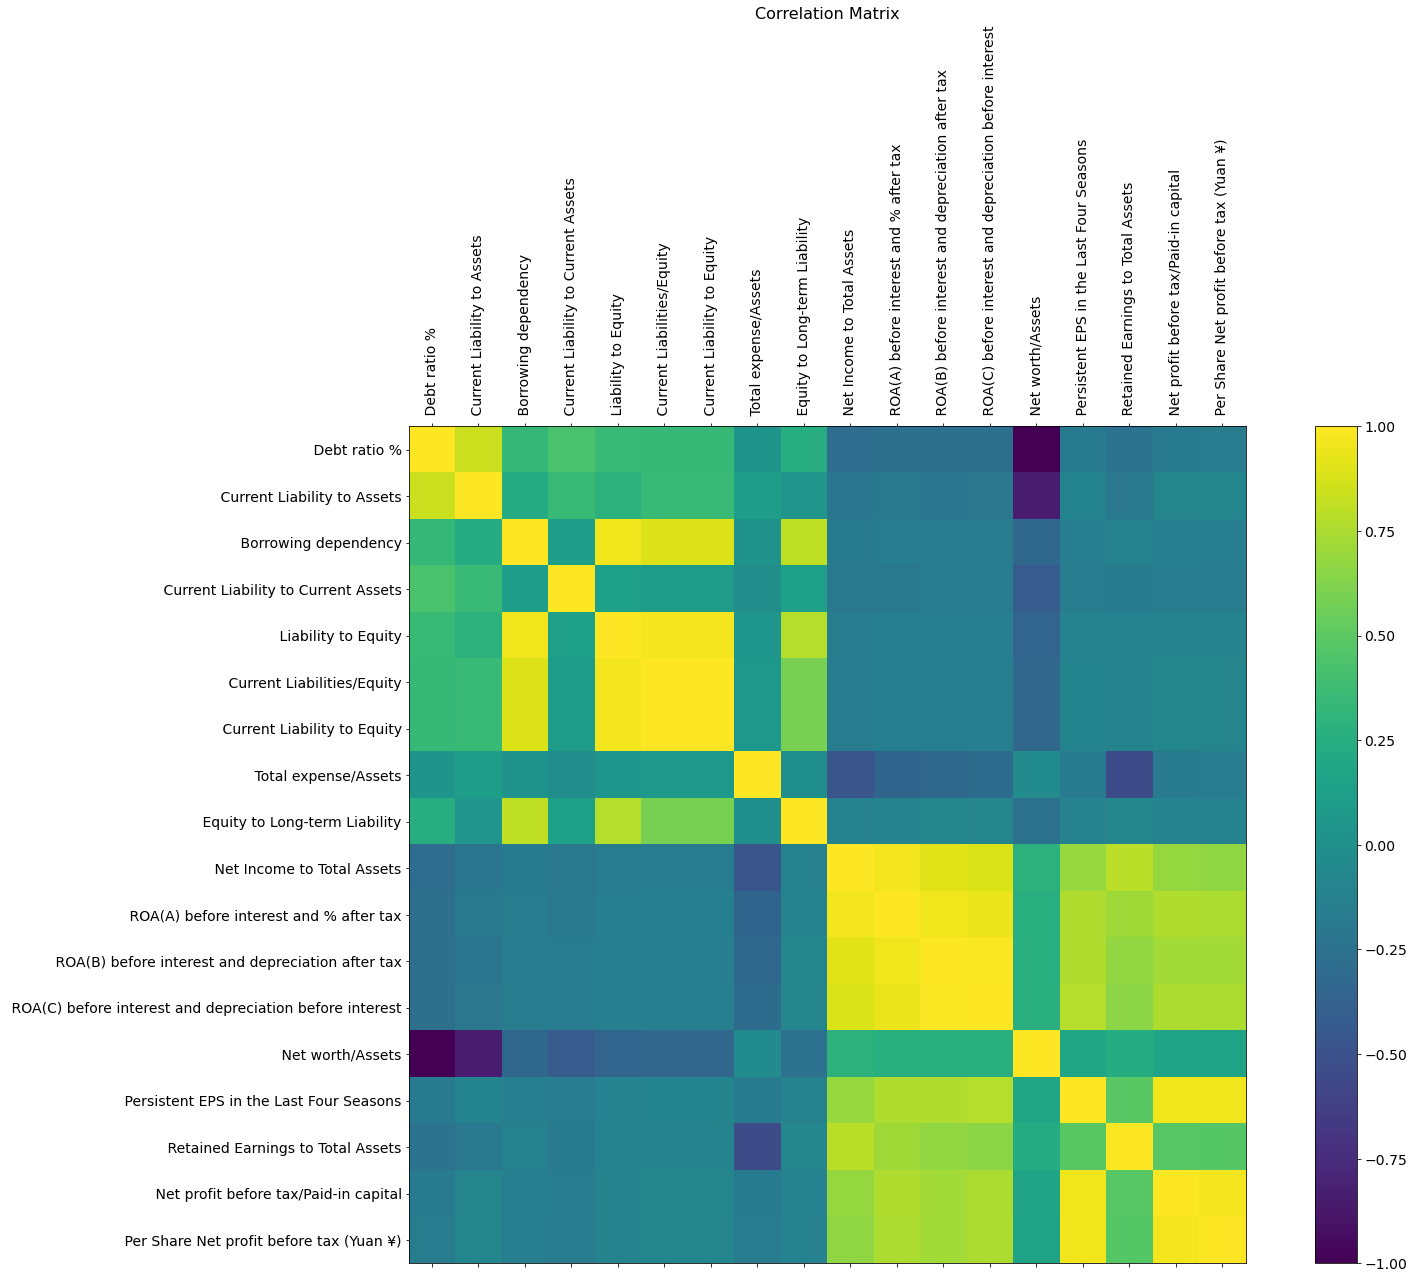

In [12]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]

f = plt.figure(figsize=(25, 15))
plt.matshow(data[relation].corr(), fignum=f.number)
plt.xticks(range(data[relation].select_dtypes(['number']).shape[1]), data[relation].select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(data[relation].select_dtypes(['number']).shape[1]), data[relation].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

There seems to be a significant relation between attributes that have a high correlation with the target attribute and a low correlation with the target attribute.
This implies that feature selection is important for our analysis

## Preprocessing the data

This section applies appropriate preprocessing steps to the data to make it ready for training models.

### Handling Missing values

In [13]:
X_raw.shape

(5455, 95)

In [14]:
X_raw[X_raw.isnull().any(axis=1)].shape

(0, 95)

In [15]:
X_raw[X_raw.isna().any(axis=1)].shape

(0, 95)

The training data has 5455 observations and 95 features. There is no missing values as shown by the checks for null and na values. 

### Categorical features

In [16]:
X_raw.dtypes

 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 95, dtype: object

After checking the datatypes of all columns in the dataset it was determined that the columns are all numerical attributes and there is no categorical data. 

Implemented below are some utility functions for the project.

### Feature Scaling

All the features are scaled(standardized) using MinMaxScaler.
The transformed values are between 0 and 1 i.e. they are normalized same as Liang et. al. 

In [17]:
from sklearn.preprocessing import MinMaxScaler

minmax_scalar = MinMaxScaler()
Standard_X = minmax_scalar.fit(X_raw)
X_raw_transformed = Standard_X.transform(X_raw)
X = pd.DataFrame(X_raw_transformed, columns=X_raw.columns,index=X_raw.index)
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
318,0.481189,0.550153,0.528832,0.899832,0.898654,0.998980,0.797443,0.791807,0.257162,0.781616,...,0.806631,1.666653e-13,0.623661,0.899830,0.756845,0.164776,0.026814,0.565265,0.0,0.070742
5796,0.522808,0.590765,0.558633,0.901002,0.899628,0.999023,0.797454,0.791812,0.257087,0.781621,...,0.827723,1.098794e-13,0.624307,0.900998,0.760811,0.172086,0.026852,0.565433,0.0,0.022433
4454,0.514614,0.586895,0.551487,0.912184,0.910989,0.999103,0.797606,0.791933,0.257191,0.781718,...,0.828627,2.551415e-13,0.624714,0.912185,0.758880,0.165181,0.026791,0.565159,0.0,0.059856
2225,0.456508,0.536851,0.504459,0.895097,0.893925,0.998967,0.797390,0.791761,0.257093,0.781572,...,0.797846,3.156365e-13,0.624621,0.895093,0.756233,0.173438,0.027673,0.567450,0.0,0.020864
3249,0.376418,0.443197,0.412785,0.999014,0.997706,0.995856,0.794096,0.788379,0.257894,0.777918,...,0.756573,2.014380e-14,0.624242,0.999011,0.752978,0.163429,0.026791,0.565158,0.0,0.233952


In [18]:
X_test_transformed = Standard_X.transform(X_test)
X_test = pd.DataFrame(X_test_transformed, columns=X_raw.columns,index=X_test.index)
X_test.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1244,0.490882,0.556149,0.536753,0.916182,0.914982,0.999043,0.797445,0.791801,0.257024,0.781609,...,0.805667,8.455800e-14,0.623746,0.916184,0.757387,0.171791,0.027273,0.566736,0.0,0.022839
6303,0.473195,0.547754,0.514374,0.900265,0.899087,0.999002,0.797424,0.791782,0.257078,0.781591,...,0.803448,1.984405e-13,0.623652,0.900264,0.756747,0.167366,0.027098,0.566292,0.0,0.035415
4712,0.543293,0.618513,0.596023,0.913863,0.912710,0.999043,0.797758,0.792117,0.257607,0.781922,...,0.839238,2.078966e-13,0.623843,0.913858,0.760748,0.167460,0.026816,0.565273,0.0,0.034892
3273,0.655558,0.692324,0.699164,0.947299,0.946059,0.999314,0.797808,0.792131,0.257096,0.781935,...,0.879037,1.159977e-13,0.624215,0.947295,0.763387,0.165097,0.026805,0.565222,0.0,0.061798
6430,0.436972,0.509976,0.477926,0.977962,0.976281,0.998738,0.797212,0.791509,0.257271,0.781240,...,0.782600,8.604712e-14,0.623938,0.977957,0.754912,0.163497,0.026709,0.564734,0.0,0.207130


### Utility Functions

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)

In [92]:
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

column_names = ["Accuracy", "ROC AUC", "Precision", "Recall", "F-1"]
training_stats_df = pd.DataFrame(columns=column_names)
test_stats_df = pd.DataFrame(columns=column_names)

def calculate_model_stats(estimator, X_data, y_data, model_name, training):
  global training_stats_df
  global test_stats_df 
  y_pred = estimator.predict(X_data)
  y_score = estimator.predict_proba(X_data)[:,1]      #this is the score
  fpr, tpr, thresholds = roc_curve(y_data, y_score)
  plt.figure(figsize=(8, 6))
  plot_roc_curve(fpr, tpr)
  plt.title('ROC Curve')
  plt.grid(True)
  plt.show()

  accuracy = accuracy_score(y_data, y_pred)
  print("accuracy:", accuracy)
  roc_auc = roc_auc_score(y_data, y_score)
  print(" ROC AUC Score: ", roc_auc)
  precision = precision_score(y_data,y_pred)
  print(" Precision score: ", precision )
  recall = recall_score(y_data,y_pred)
  print ("Recall score:", recall)
  f1 = f1_score(y_data,y_pred)
  print ("f1 score:", f1)

  if training == True:
    df = pd.DataFrame([[accuracy, roc_auc, precision, recall, f1]], columns=column_names, index=[model_name])    
    training_stats_df = training_stats_df.append(df)
    #training_stats_df = training_stats_df.drop_duplicates()
  else:
    df = pd.DataFrame([[accuracy, roc_auc, precision, recall, f1]], columns=column_names, index=[model_name])    
    test_stats_df = test_stats_df.append(df)
   # test_stats_df = test_stats_df.drop_duplicates()



In [21]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
  train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,
                                                                        X, y, cv=3,return_times=True)
  #
  # Calculate training and test mean and std
  #
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  #
  # Plot the learning curve
  #
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  #plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  #plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.title('Learning Curve')
  plt.xlabel('Training Data Size')
  plt.ylabel('Model accuracy')
  plt.grid()
  plt.legend(loc='upper right')
  plt.show()

## Logistic Regression

We start with logistic regression on the bankruptcy data. This is a binary classifier that predicts the probability of a class. Instead of outputting the prediction directly it outputs the logistic of the result. The logistic is a sigmoid function which takes values between 0 and 1.  The model is trained by optimizing parameters such that it predicts higher probabilities for positive instances and lower for negative instances.

#### Training and hyperparameter tuning

From Sklearn documentation:
For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

log_reg = LogisticRegression(random_state=42)
params = {"C": uniform(0.1, 100), "solver":['liblinear'], 
          'penalty':['l1','l2']}
rnd_search_log_reg = RandomizedSearchCV(log_reg, params, n_jobs=-1, cv=3, scoring="accuracy", n_iter=10, random_state=42)
rnd_search_log_reg.fit(X,y)
print("best params are: ", rnd_search_log_reg.best_params_)
print("best estimator:", rnd_search_log_reg.best_estimator_)


best params are:  {'C': 18.44347898661638, 'penalty': 'l2', 'solver': 'liblinear'}
best estimator: LogisticRegression(C=18.44347898661638, random_state=42, solver='liblinear')


#### Evaluation over training set

***Performance stats for logistic regression over training data***


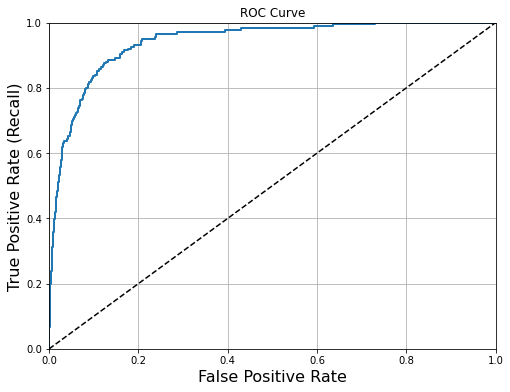

accuracy: 0.9710357470210815
 ROC AUC Score:  0.9414618815547021
 Precision score:  0.6730769230769231
Recall score: 0.19886363636363635
f1 score: 0.30701754385964913


In [89]:
print("***Performance stats for logistic regression over training data***")
calculate_model_stats(rnd_search_log_reg.best_estimator_, X,y, "log reg", True)

#### Evaluation over test set

***Performance stats for logistic regression over test data***


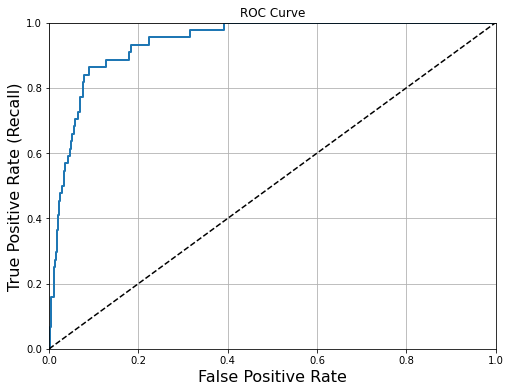

accuracy: 0.967008797653959
 ROC AUC Score:  0.9404442148760331
 Precision score:  0.4666666666666667
Recall score: 0.1590909090909091
f1 score: 0.23728813559322037


In [93]:
print("***Performance stats for logistic regression over test data***")
calculate_model_stats(rnd_search_log_reg.best_estimator_, X_test, y_test,"log reg", False)

#### Learning Curves

We plot learning curves using the best model on the training set, with a cross-validation of 3

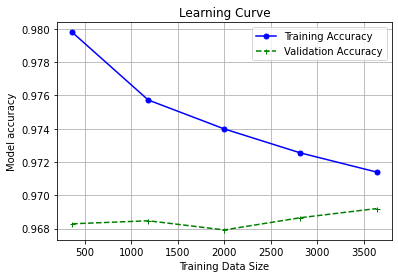

In [25]:
plot_learning_curve(rnd_search_log_reg.best_estimator_, X,y)

There is some overfitting at lower data sizes because there is a  gap between curves. But it gets gradually better as the number of instances increase and the gap reduces.

## Support Vector Machines

SVMs are used as classifiers to separate the classes with the widest possible "street" as possible. It tries to minimize the number of margin violations. 

This section trains a SVM classifier on the training data.  The best hyperparameters are searched using CV=3.

#### Training and hyperparameter tuning

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

params = {"C": uniform(0.1, 100), "kernel" : ["rbf", "linear", "sigmoid"], "gamma": reciprocal(0.001, 100)}
clf = SVC(random_state=42, probability=True, class_weight='balanced')
rnd_search_svm = RandomizedSearchCV(clf, params, n_jobs=-1, cv=3, scoring="accuracy", n_iter=10, random_state=42)
rnd_search_svm.fit(X,y)
print("best params are: ", rnd_search_svm.best_params_)
print("best estimator is:", rnd_search_svm.best_estimator_)



best params are:  {'C': 61.848150962771655, 'gamma': 1.14357802784334, 'kernel': 'rbf'}
best estimator is: SVC(C=61.848150962771655, class_weight='balanced', gamma=1.14357802784334,
    probability=True, random_state=42)


#### Evaluation over training set

***Performance stats for SVM over training data***


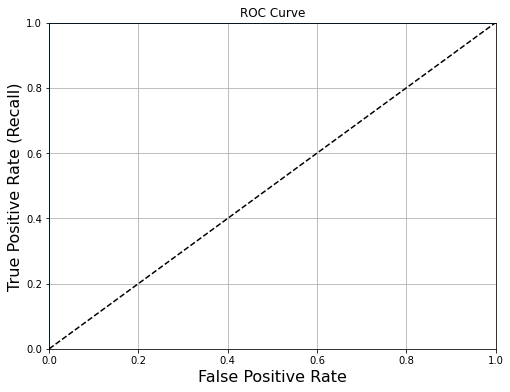

accuracy: 0.998166819431714
 ROC AUC Score:  0.999641590177203
 Precision score:  0.946236559139785
Recall score: 1.0
f1 score: 0.9723756906077349


In [94]:
print("***Performance stats for SVM over training data***")
calculate_model_stats(rnd_search_svm.best_estimator_, X,y, "svm", True)


The recall score is perfect on the training set and the precision is also high. ROC AUC and accuracy are ver high as well on the training set.

#### Evaluation over test set

Next step is to evaluate the performance of the best SVM classifer on the test dataset. 


***Performance stats for SVM over test data***


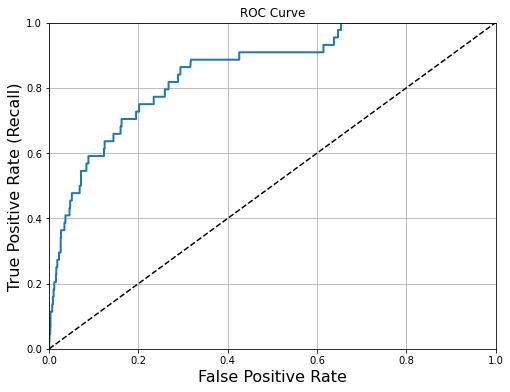

accuracy: 0.9523460410557185
 ROC AUC Score:  0.8514118457300275
 Precision score:  0.2765957446808511
Recall score: 0.29545454545454547
f1 score: 0.2857142857142857


In [95]:
print("***Performance stats for SVM over test data***")
calculate_model_stats(rnd_search_svm.best_estimator_, X_test, y_test, "svm", False)

Precision and recall are lower than the training set. Acuuracy drops over the test set so does the ROC AUC but both are still reasonably high.

#### Learning Curves

Learning curves are plotted on training set using cv=3.

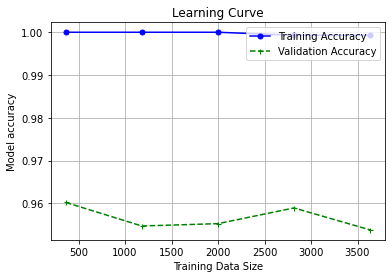

In [29]:
plot_learning_curve(rnd_search_svm.best_estimator_, X,y)

The curves show overfitting on the training set but a lesser accuracy on the validation set. The curves do not get closer when the training data size increases indicating that adding instances does not help reduce overfitting.   The accuracies are close to each other so the overfitting is not much.

##PCA

In [30]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pca = PCA(n_components=0.95)
X_reduced_pca=pca.fit_transform(X)
X_recoverd_pca = pca.inverse_transform(X_reduced_pca)
mean_squared_error(X, X_recoverd_pca)

0.0004940635018922932

In [31]:
pca.explained_variance_ratio_

array([0.16875855, 0.14554589, 0.10771396, 0.0871236 , 0.08584253,
       0.07774439, 0.06455178, 0.04941605, 0.04828937, 0.03704018,
       0.02501054, 0.01816285, 0.01288172, 0.01181515, 0.0078574 ,
       0.00651295])

In [32]:
pca.n_components_

16

16 components are able to cover 95% of the variance.

## Support Vector Machines with PCA

PCA performs feature selection on the input dataset. PCA projects the high dimensional data onto an axis such that largest amount of  variance is accounted for. It then identifies another axis orthogonal to the first one which accounts for the second largest amount of variance and so on. Our dataset has 95 attributes, so we explore if we can get similar model performance with lesser number of dimensions. 

PCA is  performed on the input dataset with an explained variance ratio of 95%.

#### Training and hyperparameter tuning

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

params = {"C": uniform(0.1, 100), "kernel" : ["rbf", "linear", "sigmoid"], "gamma": reciprocal(0.001, 100)}
clf = SVC(random_state=42, probability=True ,class_weight="balanced")
rnd_search_svm_pca = RandomizedSearchCV(clf, params, n_jobs=-1, cv=3, scoring="accuracy", n_iter=10, random_state=42)
rnd_search_svm_pca.fit(X_reduced_pca,y)
print("best estimator is: ", rnd_search_svm_pca.best_estimator_)
print("best params are: ", rnd_search_svm_pca.best_params_)

best estimator is:  SVC(C=61.848150962771655, class_weight='balanced', gamma=1.14357802784334,
    probability=True, random_state=42)
best params are:  {'C': 61.848150962771655, 'gamma': 1.14357802784334, 'kernel': 'rbf'}


#### Evaluation over training set

***Performance stats for SVM (with pca) over training data***


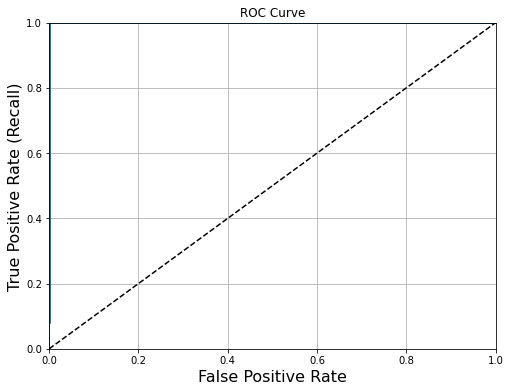

accuracy: 0.9923006416131989
 ROC AUC Score:  0.9987708588059033
 Precision score:  0.8073394495412844
Recall score: 1.0
f1 score: 0.8934010152284264


In [96]:
print("***Performance stats for SVM (with pca) over training data***")
calculate_model_stats(rnd_search_svm_pca.best_estimator_,X_reduced_pca,y, "svm (with pca)", True)

The numbers using PCA are pretty similar to what we saw for SVM without PCA over training data. Precision drops slightly but for this problem recall is more important. This means focussing on PCs does not reduce model performance over training data.


#### Evaluation over test set

Next step is to evaluate the performance of the best SVM classifer on the test dataset. 
Note that pca is not recalculated and fit over the test set. The already fit pca over the training set is used to perform a transform over the testset. This avoids data leaking (as the combined dataset isn't fitted with pca) and it also avoids introducing errors by fitting on train/test separately as the resulting components may have different directions in that case.


***Performance stats for SVM (with pca) over test data***


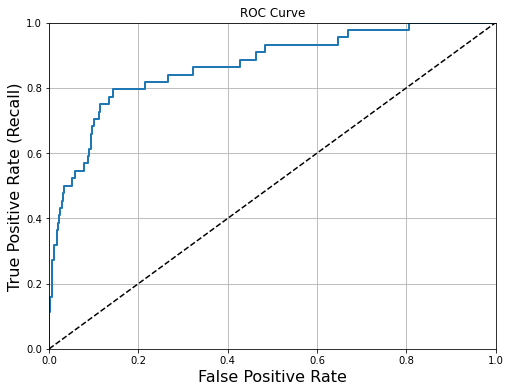

accuracy: 0.9567448680351907
 ROC AUC Score:  0.8682851239669421
 Precision score:  0.35294117647058826
Recall score: 0.4090909090909091
f1 score: 0.37894736842105264


In [97]:
X_test_reduced = pca.transform(X_test)

print("***Performance stats for SVM (with pca) over test data***")
calculate_model_stats(rnd_search_svm_pca.best_estimator_,X_test_reduced,y_test, "svm (with pca)", False)

The numbers using PCA are slightly better to what we saw for SVM without PCA over test data. This means that PCA is helping improve performance of our SVM classifier over test data.


#### Learning Curves

Learning curves are plotted on training dataset with cv=3.

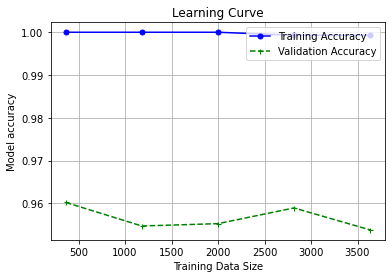

In [36]:
plot_learning_curve(rnd_search_svm_pca.best_estimator_, X,y)

This is pretty much similar to SVMs without PCA. The accuracy on validation set does not improve much by adding more instances of training data. The model is slightly overfitting overall due to the gap between curves which does not reduce with increasing training data size.

## Random Forest Classifier

Random Forest is based on Bagging. Bagging stands for boostrap aggregation. Bagging samples the given training set with replacement and trains individual models. The final ensemble model's output is based on majority voting. Random Forest randomly selects a set of training instances (with replacement) and trains a decision tree. 

RandomForestClassifier is tuned using GridSearchCv over n_estimators=[500, 750, 100], max_leaf_nodes = [16,32, 64] over cv=10. 

#### Training and hyperparameter tuning

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rndforest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {"n_estimators": [500, 750, 1000], "max_leaf_nodes" : [16, 32, 64], "class_weight":["balanced"]}
grid_search_rnd_clf = GridSearchCV(rndforest_clf, params, n_jobs=-1, cv=3, scoring="accuracy")
grid_search_rnd_clf.fit(X,y)
print("best params from grid search for random forest classifier are: ", grid_search_rnd_clf.best_params_)
print("Best estimator is:", grid_search_rnd_clf.best_estimator_)


best params from grid search for random forest classifier are:  {'class_weight': 'balanced', 'max_leaf_nodes': 64, 'n_estimators': 500}
Best estimator is: RandomForestClassifier(class_weight='balanced', max_leaf_nodes=64,
                       n_estimators=500, n_jobs=-1, random_state=42)


#### Evaluation over training set

***Performance stats for RandomForestClassifier over training data***


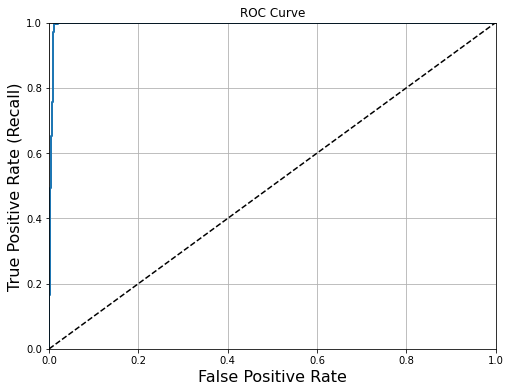

accuracy: 0.9827681026581119
 ROC AUC Score:  0.9959573955122354
 Precision score:  0.6529850746268657
Recall score: 0.9943181818181818
f1 score: 0.7882882882882883


In [98]:
print("***Performance stats for RandomForestClassifier over training data***")
calculate_model_stats(grid_search_rnd_clf.best_estimator_,X,y, "rnd_forest", True)

#### Evaluation over test set

***Performance stats for RandomForestClassifier over test data***


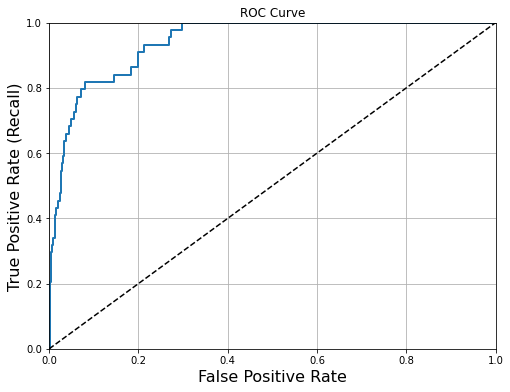

accuracy: 0.9604105571847508
 ROC AUC Score:  0.9413567493112948
 Precision score:  0.40384615384615385
Recall score: 0.4772727272727273
f1 score: 0.4375


In [99]:
print("***Performance stats for RandomForestClassifier over test data***")
calculate_model_stats(grid_search_rnd_clf.best_estimator_,X_test,y_test, "rnd_forest", False)

RandomForestClassifier gives much higher precision, ROC AUC score and accuracy as SVM and lower recall on test set compared to the SVM model.

#### Learning Curves

Learning curves are plotted on training dataset with cv=3.

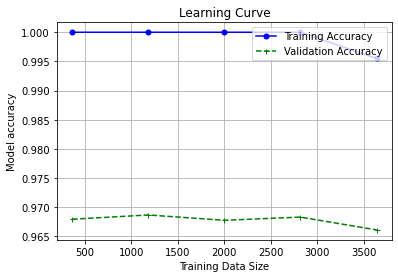

In [40]:
plot_learning_curve(grid_search_rnd_clf.best_estimator_, X,y)

Looks similar to SVMs. There is slightly overfitting because of the gap between the curves and it does not get any better with increasing training data size. Accuracies are close in value but there is still a gap so the overfitting is not that much.

## AdaBoost Classifier

Next we train an AdaBoost Classifier on our data. Adaboost is an ensemble method. It starts with a base classifier e.g. DecisionTree. It then assigns higher weights to instances that were misclassified by the first model and uses these weights to train the next model and so on. The process continues till a low error is achieved. The last step is to build an ensemble from all these trained individual models. 

#### Training and hyperparameter tuning

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2, max_leaf_nodes = 64), n_estimators=500,
    algorithm="SAMME.R", learning_rate=1.0, random_state = 42)

params = {"base_estimator__criterion" : ["gini"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [500]
             }

grid_search_adaboost = GridSearchCV(ada_clf, 
                              params, n_jobs=-1, cv=3)
grid_search_adaboost.fit(X, y)
print("best estimator is: ", grid_search_adaboost.best_estimator_)
print("best params are: ", grid_search_adaboost.best_params_)

best estimator is:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         max_leaf_nodes=64),
                   n_estimators=500, random_state=42)
best params are:  {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 500}


#### Evaluation over training set

***Performance stats for AdaBoost Classifier over training data***


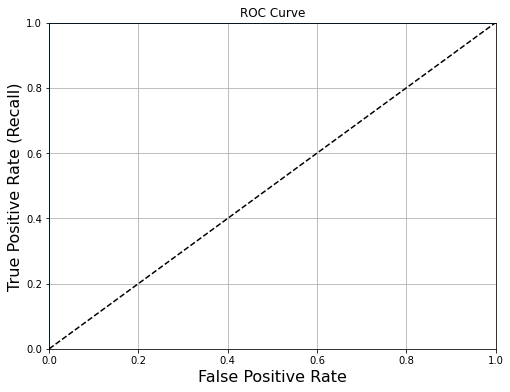

accuracy: 1.0
 ROC AUC Score:  1.0
 Precision score:  1.0
Recall score: 1.0
f1 score: 1.0


In [100]:
print("***Performance stats for AdaBoost Classifier over training data***")
calculate_model_stats(grid_search_adaboost.best_estimator_,X,y, "ada_boost", True)

AdaBoostClassifier gives perfect scores.

#### Evaluation over test set

***Performance stats for AdaBoost Classifier over test data***


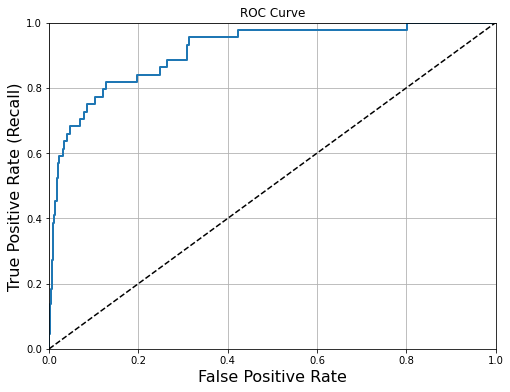

accuracy: 0.9706744868035191
 ROC AUC Score:  0.9130681818181818
 Precision score:  0.5833333333333334
Recall score: 0.3181818181818182
f1 score: 0.4117647058823529


In [101]:
print("***Performance stats for AdaBoost Classifier over test data***")
calculate_model_stats(grid_search_adaboost.best_estimator_,X_test,y_test, "ada_boost", False)

Not so good over test data. AdaBoost was overfitting on the training data but accuracy and ROC AUC is still very high on test data.

#### Learning Curves

Learning curves are plotted on the training dataset using cv=3.

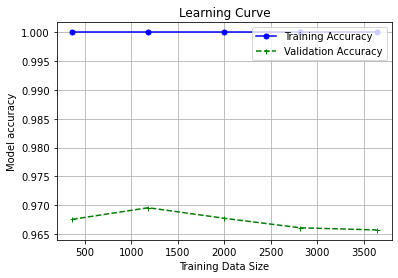

In [44]:
plot_learning_curve(grid_search_adaboost.best_estimator_, X,y)

There is gap between the curves and it does not reduce with adding training instances. The model is slightly overfitting as the accuracies are close but still there is a gap.

## Gradient Boosting Classifier

This is similar to the AdaBoost Classifier except that instead of tweaking weights at every step and training models, it trains models on the residual errors. 

#### Training and hyperparameter tuning

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(max_depth=2, learning_rate=1.0, random_state=42)

params = {'max_leaf_nodes': [32,64], 
          "n_estimators": [250, 500, 750]}

grid_search_gboost = GridSearchCV(grad_boost_clf, params, n_jobs=-1, cv=3)
grid_search_gboost.fit(X, y)
print("best estimator is: ", grid_search_gboost.best_estimator_)
print("best params are: ", grid_search_gboost.best_params_)

best estimator is:  GradientBoostingClassifier(learning_rate=1.0, max_depth=2, max_leaf_nodes=32,
                           n_estimators=250, random_state=42)
best params are:  {'max_leaf_nodes': 32, 'n_estimators': 250}


#### Evaluation over training set

***Performance stats for Gradient Boosting Classifier over training data***


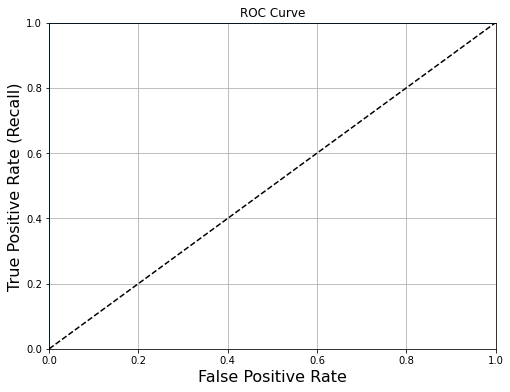

accuracy: 1.0
 ROC AUC Score:  1.0
 Precision score:  1.0
Recall score: 1.0
f1 score: 1.0


In [102]:
print("***Performance stats for Gradient Boosting Classifier over training data***")
calculate_model_stats(grid_search_gboost.best_estimator_,X,y, "grad_boost", True)

#### Evaluation over test set

***Performance stats for Gradient Boosting Classifier over test data***


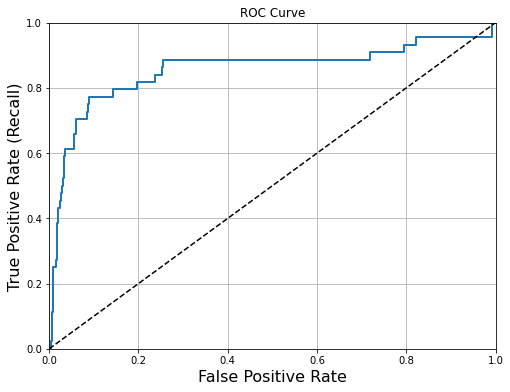

accuracy: 0.9633431085043989
 ROC AUC Score:  0.8555268595041322
 Precision score:  0.425
Recall score: 0.38636363636363635
f1 score: 0.40476190476190477


In [103]:
print("***Performance stats for Gradient Boosting Classifier over test data***")
calculate_model_stats(grid_search_gboost.best_estimator_,X_test,y_test, "grad_boost", False)

Similar to AdaBoost, this gives perfect scores on training data. Accuracy and ROC AUC are high on test data but precision/recall fall. 

#### Learning Curves

Learning curves are plotted on training set using cv=3

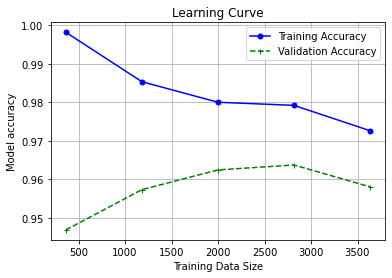

In [48]:
plot_learning_curve(grid_search_gboost.best_estimator_, X,y)

This curves looks better than most of the models and is pretty similar to the learning curve seen for logistic regression. There is some overfitting initially but as the training data size increases the overfitting reduces. One difference between the curves for logistic regression and Gradient boosting are that the curves are moving closer to each other at large training data sizes which is not the case for gradient boosting where after around 2700 training instances the accuracy is dropping for both.

## Extra- trees Classifier

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

extrtrees_clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)
params = {"n_estimators": [500, 750, 1000], "max_leaf_nodes" : [16, 32, 64], "class_weight":["balanced"]}
grid_search_extrtrees_clf = GridSearchCV(rndforest_clf, params, n_jobs=-1, cv=3, scoring="accuracy")
grid_search_extrtrees_clf.fit(X,y)
print("best params from grid search for extra-trees classifier are: ", grid_search_extrtrees_clf.best_params_)
print("Best estimator is:", grid_search_extrtrees_clf.best_estimator_)


best params from grid search for extra-trees classifier are:  {'class_weight': 'balanced', 'max_leaf_nodes': 64, 'n_estimators': 500}
Best estimator is: RandomForestClassifier(class_weight='balanced', max_leaf_nodes=64,
                       n_estimators=500, n_jobs=-1, random_state=42)


#### Evaluation over training set

***Performance stats for Extra-trees Classifier over training data***


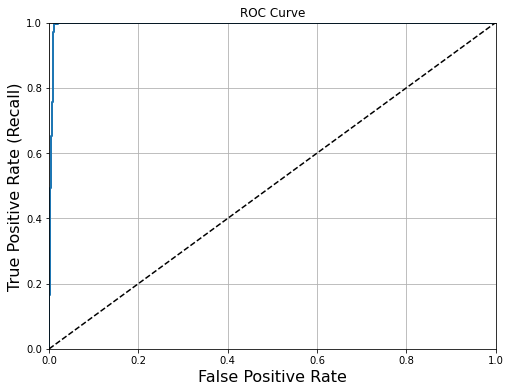

accuracy: 0.9827681026581119
 ROC AUC Score:  0.9959573955122354
 Precision score:  0.6529850746268657
Recall score: 0.9943181818181818
f1 score: 0.7882882882882883


In [104]:
print("***Performance stats for Extra-trees Classifier over training data***")
calculate_model_stats(grid_search_extrtrees_clf.best_estimator_,X,y, "ext_trees", True)

#### Evaluation over test set

***Performance stats for Extra-trees Classifier over test data***


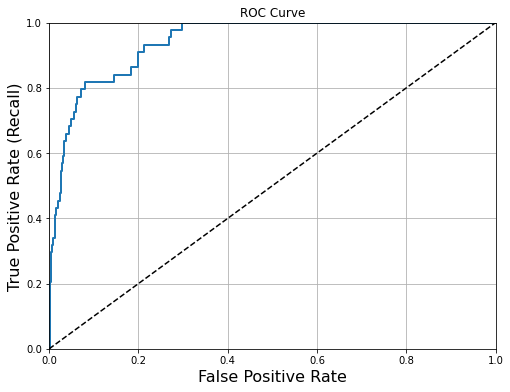

accuracy: 0.9604105571847508
 ROC AUC Score:  0.9413567493112948
 Precision score:  0.40384615384615385
Recall score: 0.4772727272727273
f1 score: 0.4375


In [105]:
print("***Performance stats for Extra-trees Classifier over test data***")
calculate_model_stats(grid_search_extrtrees_clf.best_estimator_,X_test,y_test, "ext_trees", False)

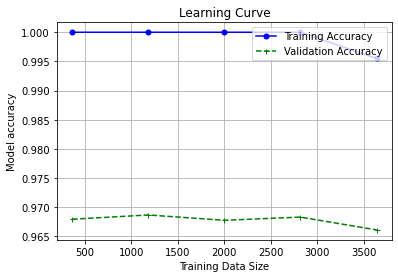

In [54]:
plot_learning_curve(grid_search_extrtrees_clf.best_estimator_, X,y)

## Bagging and Pasting Classifier

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bc_params = { 'bootstrap_features': [True],
    'n_estimators': [250,400,500],
    'oob_score': [True, False]
}

grid_srch_bag_clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=3, verbose=1, n_jobs=-1)
grid_srch_bag_clf.fit(X, y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'bootstrap_features': [True],
                         'n_estimators': [250, 400, 500],
                         'oob_score': [True, False]},
             verbose=1)

In [56]:
print("best estimator is: ", grid_srch_bag_clf.best_estimator_)
print("best params are: ", grid_srch_bag_clf.best_params_)

best estimator is:  BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  bootstrap_features=True, n_estimators=250, oob_score=True)
best params are:  {'bootstrap_features': True, 'n_estimators': 250, 'oob_score': True}


#### Evaluation over training set

***Performance stats for Bagging Classifier over training data***


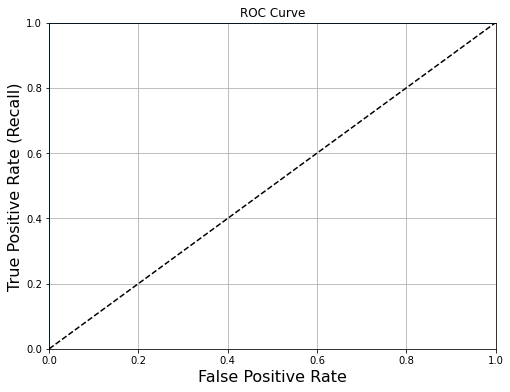

accuracy: 1.0
 ROC AUC Score:  1.0
 Precision score:  1.0
Recall score: 1.0
f1 score: 1.0


In [106]:
print("***Performance stats for Bagging Classifier over training data***")
calculate_model_stats(grid_srch_bag_clf.best_estimator_,X,y, "bagging clf", True)

#### Evaluation over test set

***Performance stats for Bagging Classifier over test data***


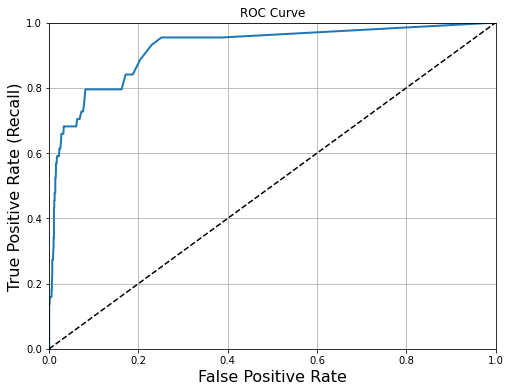

accuracy: 0.967741935483871
 ROC AUC Score:  0.9213412534435261
 Precision score:  0.5
Recall score: 0.1590909090909091
f1 score: 0.2413793103448276


In [107]:
print("***Performance stats for Bagging Classifier over test data***")
calculate_model_stats(grid_srch_bag_clf.best_estimator_,X_test,y_test, "bagging clf", False)

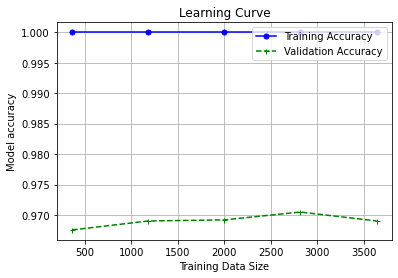

In [59]:
plot_learning_curve(grid_srch_bag_clf.best_estimator_, X,y)

## Voting Classifiers

We will use the best estimators from the previously defined classifiers and aggregate the predictions of each classifier

In [81]:
#hard-voting classifier
from sklearn.ensemble import VotingClassifier
logreg = rnd_search_log_reg.best_estimator_
svm = rnd_search_svm.best_estimator_
rnd = grid_search_rnd_clf.best_estimator_
adab = grid_search_adaboost.best_estimator_
gbst = grid_search_gboost.best_estimator_


hard_voting_clf = VotingClassifier(
    estimators=[('log reg', logreg), ('svm', svm), ('rnd', rnd), ('adab', adab), ('gbst', gbst)],
    voting='hard')
hard_voting_clf.fit(X, y)

hard_val_pred = hard_voting_clf.predict(X_test)

predict_proba is not available when voting='hard'

In [82]:
print("***Performance stats for Voting Classifier over test data***")
accuracy = accuracy_score(y_test, hard_val_pred)
print(" Accuracy score: ", accuracy)
precision = precision_score(y_test, hard_val_pred)
print(" Precision score: ", precision )
recall = recall_score(y_test, hard_val_pred)
print ("Recall score:", recall)

***Performance stats for Voting Classifier over test data***
 Accuracy score:  0.969208211143695
 Precision score:  0.5454545454545454
Recall score: 0.2727272727272727


In [83]:
soft_voting_clf = VotingClassifier(
    estimators=[('log reg', logreg), ('svm', svm), ('rnd', rnd), ('adab', adab), ('gbst', gbst)],
    voting='soft')
soft_voting_clf.fit(X, y)

VotingClassifier(estimators=[('log reg',
                              LogisticRegression(C=18.44347898661638,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('svm',
                              SVC(C=61.848150962771655, class_weight='balanced',
                                  gamma=1.14357802784334, probability=True,
                                  random_state=42)),
                             ('rnd',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_leaf_nodes=64,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('adab',
                              AdaBoostClassifier(base_estimator=DecisionT

#### Evaluation over training set

***Performance stats for Soft voting Classifier over training data***


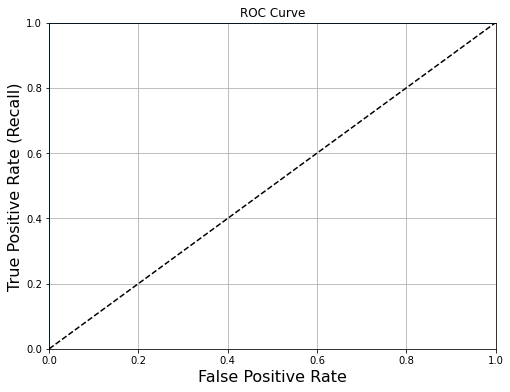

accuracy: 0.9998166819431714
 ROC AUC Score:  1.0
 Precision score:  1.0
Recall score: 0.9943181818181818
f1 score: 0.9971509971509972


In [108]:
print("***Performance stats for Soft voting Classifier over training data***")
calculate_model_stats(soft_voting_clf,X,y, "soft voting", True)

#### Evaluation over test set

***Performance stats for Soft voting Classifier over test data***


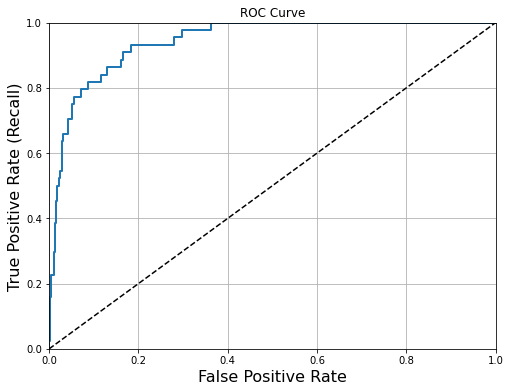

accuracy: 0.968475073313783
 ROC AUC Score:  0.944025482093664
 Precision score:  0.5263157894736842
Recall score: 0.22727272727272727
f1 score: 0.31746031746031744


In [109]:
print("***Performance stats for Soft voting Classifier over test data***")
calculate_model_stats(soft_voting_clf,X_test,y_test, "soft voting", False)

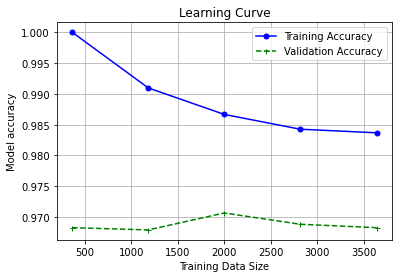

In [110]:
plot_learning_curve(soft_voting_clf, X,y)

## k-Nearest Neighbors (k-NN) Classifier

In [111]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_params = { 'n_neighbors': range(1,10,1),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}
gridsearch_kNN = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
gridsearch_kNN.fit(X, y)
print("best estimator is: ", gridsearch_kNN.best_estimator_)
print("best params are: ", gridsearch_kNN.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
best estimator is:  KNeighborsClassifier(n_neighbors=9)
best params are:  {'algorithm': 'auto', 'n_neighbors': 9}


#### Evaluation over training set

***Performance stats for k-NN Classifier over train data***


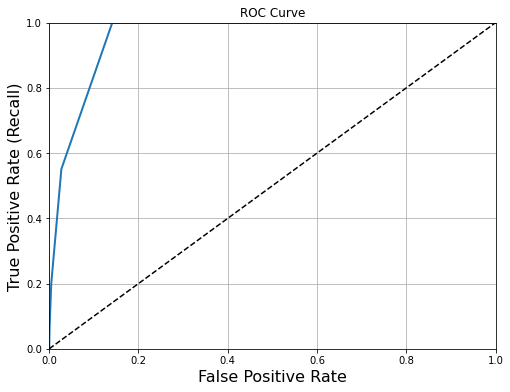

accuracy: 0.9684692942254812
 ROC AUC Score:  0.9561658328884604
 Precision score:  0.75
Recall score: 0.03409090909090909
f1 score: 0.06521739130434782


In [112]:
print("***Performance stats for k-NN Classifier over train data***")
calculate_model_stats(gridsearch_kNN.best_estimator_,X,y, "k-NN", True)

#### Evaluation over test set

***Performance stats for k-NN Classifier over test data***


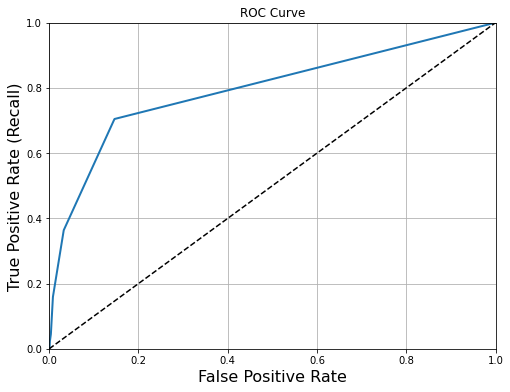

accuracy: 0.967008797653959
 ROC AUC Score:  0.7952393250688705
 Precision score:  0.3333333333333333
Recall score: 0.022727272727272728
f1 score: 0.04255319148936171


In [113]:
print("***Performance stats for k-NN Classifier over test data***")
calculate_model_stats(gridsearch_kNN.best_estimator_,X_test,y_test, "k-NN", False)

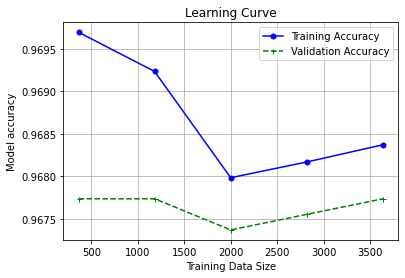

In [114]:
plot_learning_curve(gridsearch_kNN.best_estimator_, X,y)

## Feature Selection using Random Forests

In [115]:
fs_rndf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {"n_estimators": [150,250,500]}
fs_grid_search_rnd_clf = GridSearchCV(fs_rndf_clf, params, n_jobs=-1, cv=5, scoring="accuracy")
fs_grid_search_rnd_clf.fit(X,y)
print("best params from grid search for random forest classifier are: ", fs_grid_search_rnd_clf.best_params_)
print("Best estimator is:", fs_grid_search_rnd_clf.best_estimator_)

best params from grid search for random forest classifier are:  {'n_estimators': 250}
Best estimator is: RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)


In [116]:
model = fs_grid_search_rnd_clf.best_estimator_
feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': model.feature_importances_}).sort_values('importance', ascending = False)
feature_importances.head(15)

,feature,importance
89,Net Income to Stockholder's Equity,0.033052
18,Persistent EPS in the Last Four Seasons,0.028376
39,Borrowing dependency,0.028321
42,Net profit before tax/Paid-in capital,0.023891
56,Cash/Total Assets,0.021403
91,Degree of Financial Leverage (DFL),0.021046
15,Net Value Per Share (B),0.020289
34,Interest Expense Ratio,0.020213
22,Per Share Net profit before tax (Yuan ¥),0.019469
64,Working Capital/Equity,0.019311


In [117]:
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 3 features with 0.0 importance


,feature,importance
52,Allocation rate per person,0.000024
20,Revenue Per Share (Yuan ¥),0.000021
50,Revenue per person,0.000000
93,Net Income Flag,0.000000
57,Quick Assets/Current Liability,0.000000


This is in agreement to our data visualization analysis as we noticed "Net Income Flag" did not provide any inference  

In [118]:
def plot_feature_importances(data,n,threshold):
    """
    Plots important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.95
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 10
    
    # Sort features according to importance
    df = data.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (15, 20))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:n]))), 
            df['importance_normalized'].head(n), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:n]))))
    ax.set_yticklabels(df['feature'].head(n))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (6, 4))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

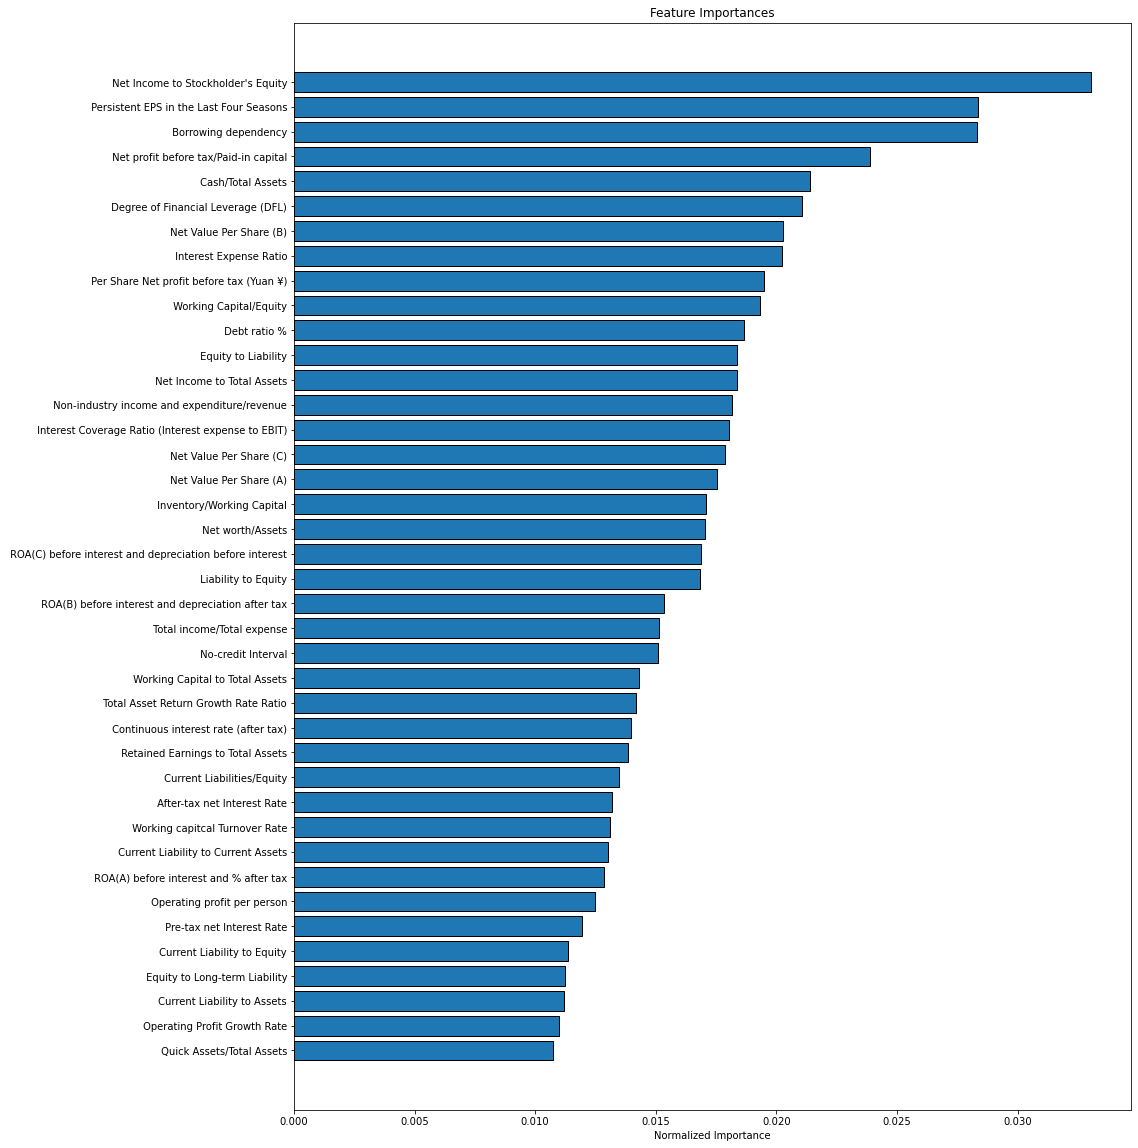

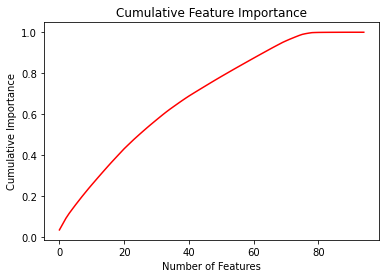

70 features required for 0.95 of cumulative importance


In [119]:
threshold = 0.95
norm_feature_importances = plot_feature_importances(feature_importances, 40, threshold)

In [120]:
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

# Create new datasets with smaller features
fs_X = X[features_to_keep]
fs_X_test = X_test[features_to_keep]

Implementing Logistic Regression and SVM on the reduced dataset to understand if feature selection helps with model accuracy

In [121]:
fs_log_reg = LogisticRegression(random_state=42)
params = {"C": uniform(0.1, 100), "solver":['liblinear'], 
          'penalty':['l1','l2']}
fs_rnd_search_log_reg = RandomizedSearchCV(log_reg, params, n_jobs=-1, cv=3, scoring="accuracy", n_iter=10, random_state=42)
fs_rnd_search_log_reg.fit(fs_X,y)
print("best params are: ", fs_rnd_search_log_reg.best_params_)
print("best estimator:", fs_rnd_search_log_reg.best_estimator_)

best params are:  {'C': 5.908361216819946, 'penalty': 'l2', 'solver': 'liblinear'}
best estimator: LogisticRegression(C=5.908361216819946, random_state=42, solver='liblinear')


#### Evaluation over training set

***Performance stats for Logistic Regression over training data reduced***


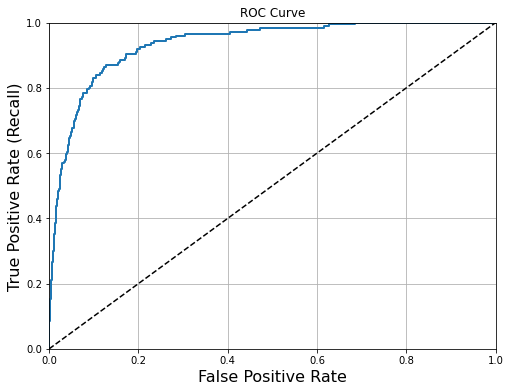

accuracy: 0.9697525206232814
 ROC AUC Score:  0.934991131240421
 Precision score:  0.6341463414634146
Recall score: 0.14772727272727273
f1 score: 0.23963133640552997


In [122]:
print("***Performance stats for Logistic Regression over training data reduced***")
calculate_model_stats(fs_rnd_search_log_reg.best_estimator_, fs_X,y, "fs_logreg", True)

#### Evaluation over test set

***Performance stats for Logistic Regression over testing data reduced***


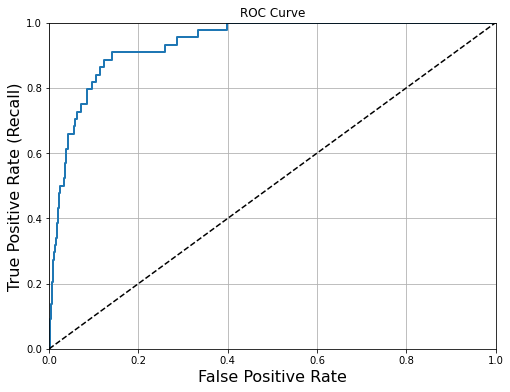

accuracy: 0.967741935483871
 ROC AUC Score:  0.9370867768595041
 Precision score:  0.5
Recall score: 0.13636363636363635
f1 score: 0.21428571428571427


In [123]:
print("***Performance stats for Logistic Regression over testing data reduced***")
calculate_model_stats(fs_rnd_search_log_reg.best_estimator_, fs_X_test,y_test, "fs_logreg", False)

In comparison to logistic regression applied on full dataset, we observe precision has improved whereas the recall has deteriorated. This does not align with our goal

In [124]:
params = {"C": uniform(0.1, 100), "kernel" : ["rbf", "linear", "sigmoid"], "gamma": reciprocal(0.001, 100)}
fs_clf = SVC(random_state=42, probability=True, class_weight='balanced')
fs_rnd_search_svm = RandomizedSearchCV(clf, params, n_jobs=-1, cv=3, scoring="accuracy", n_iter=10, random_state=42)
fs_rnd_search_svm.fit(fs_X,y)
print("best params are: ", fs_rnd_search_svm.best_params_)
print("best estimator is:", fs_rnd_search_svm.best_estimator_)


best params are:  {'C': 61.848150962771655, 'gamma': 1.14357802784334, 'kernel': 'rbf'}
best estimator is: SVC(C=61.848150962771655, class_weight='balanced', gamma=1.14357802784334,
    probability=True, random_state=42)


#### Evaluation over training set

***Performance stats for SVM over training data reduced***


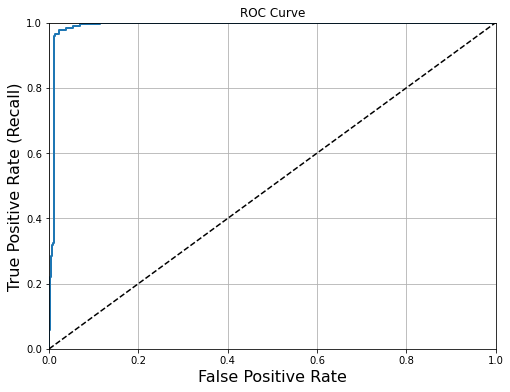

accuracy: 0.9527039413382218
 ROC AUC Score:  0.9906781156899551
 Precision score:  0.40420560747663553
Recall score: 0.9829545454545454
f1 score: 0.5728476821192052


In [125]:
print("***Performance stats for SVM over training data reduced***")
calculate_model_stats(fs_rnd_search_svm.best_estimator_, fs_X,y, "fs_svm", True)

#### Evaluation over test set

***Performance stats for SVM over testing data reduced***


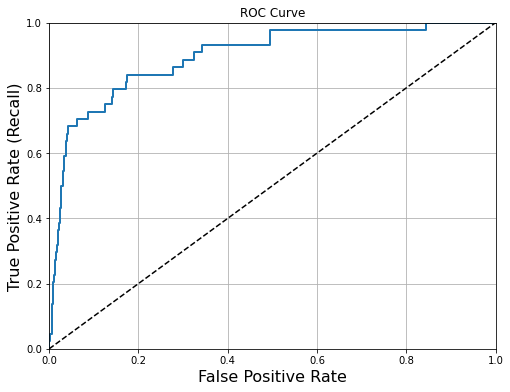

accuracy: 0.9303519061583577
 ROC AUC Score:  0.8960399449035812
 Precision score:  0.2743362831858407
Recall score: 0.7045454545454546
f1 score: 0.3949044585987261


In [126]:
print("***Performance stats for SVM over testing data reduced***")
calculate_model_stats(fs_rnd_search_svm.best_estimator_, fs_X_test,y_test, "fs_svm", False)

In comparison to the SVM implemented on full dataset without PCA, for the same level of precision we notice that the recall has improved. This implies we can predict with more accuracy the actual bunkrupt firms. However, the model labels a lot of healthy firms as bankrupt  

# Summary of results

We present below a summary of results



## Training data
Below is a summary of performance metrics for the classifiers over training data

In [127]:
training_stats_df

,Accuracy,ROC AUC,Precision,Recall,F-1
svm,0.998167,0.999642,0.946237,1.000000,0.972376
svm (with pca),0.992301,0.998771,0.807339,1.000000,0.893401
rnd_forest,0.982768,0.995957,0.652985,0.994318,0.788288
ada_boost,1.000000,1.000000,1.000000,1.000000,1.000000
grad_boost,1.000000,1.000000,1.000000,1.000000,1.000000
ext_trees,0.982768,0.995957,0.652985,0.994318,0.788288
bagging clf,1.000000,1.000000,1.000000,1.000000,1.000000
soft voting,0.999817,1.000000,1.000000,0.994318,0.997151
k-NN,0.968469,0.956166,0.750000,0.034091,0.065217
fs_logreg,0.969753,0.934991,0.634146,0.147727,0.239631


## Test data
Below is a summary of performance metrics for the classifiers over test data

In [128]:
test_stats_df

,Accuracy,ROC AUC,Precision,Recall,F-1
log reg,0.967009,0.940444,0.466667,0.159091,0.237288
svm,0.952346,0.851412,0.276596,0.295455,0.285714
svm (with pca),0.956745,0.868285,0.352941,0.409091,0.378947
rnd_forest,0.960411,0.941357,0.403846,0.477273,0.437500
ada_boost,0.970674,0.913068,0.583333,0.318182,0.411765
grad_boost,0.963343,0.855527,0.425000,0.386364,0.404762
ext_trees,0.960411,0.941357,0.403846,0.477273,0.437500
bagging clf,0.967742,0.921341,0.500000,0.159091,0.241379
soft voting,0.968475,0.944025,0.526316,0.227273,0.317460
k-NN,0.967009,0.795239,0.333333,0.022727,0.042553
